In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [2]:
train_path = r'../preprocessed_data/preprocessed_train.csv'
test_path = r'../preprocessed_data/preprocessed_test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# DATA SPLIT

In [3]:
feature_names = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
                 'talk_time', 'blue_1', 'dual_sim_1', 'four_g_1',
                 'n_cores_2', 'n_cores_3', 'n_cores_4', 'n_cores_5', 'n_cores_6',
                 'n_cores_7', 'n_cores_8', 'three_g_1', 'touch_screen_1', 'wifi_1']

In [4]:
X = train_df[feature_names]
y = train_df['price_range']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 1021)

# RANDOM FOREST PARAMETER

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
params = {'max_depth' : [3, 5, 10, 20], 'min_samples_leaf' : [1, 10, 20, 30]}

grid_rf = GridSearchCV(RandomForestClassifier(random_state = 1021), params, cv = 5)
grid_rf.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1021),
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [1, 10, 20, 30]})

In [9]:
grid_rf.best_params_

{'max_depth': 20, 'min_samples_leaf': 1}

In [10]:
grid_rf_result = pd.DataFrame(grid_rf.cv_results_['params'])
grid_rf_result['score'] = grid_rf.cv_results_['mean_test_score']

In [11]:
pd.pivot_table(grid_rf_result, index = 'max_depth', columns = 'min_samples_leaf', values = 'score', aggfunc = 'mean')

min_samples_leaf,1,10,20,30
max_depth,,,,
3,0.795714,0.792857,0.795000,0.797143
5,0.828571,0.825714,0.816429,0.807143
10,0.864286,0.848571,0.827143,0.817143
20,0.867857,0.850714,0.825000,0.817143


# RANDOM FOREST

In [12]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)

rf_pred = rf.predict(valid_x)

In [14]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
from sklearn.metrics import accuracy_score, mean_absolute_error, root_mean_squared_error

In [16]:
rf_acc = accuracy_score(valid_y, rf_pred)
rf_mae = mean_absolute_error(valid_y, rf_pred)
rf_rmse = root_mean_squared_error(valid_y, rf_pred)

print(f'''
RANDOM FOREST
    ACCRACY : {rf_acc}
    MAE : {rf_mae}
    RMSE : {rf_rmse}
''')


RANDOM FOREST
    ACCRACY : 0.8566666666666667
    MAE : 0.14333333333333334
    RMSE : 0.37859388972001823



# TEST DATA

In [17]:
test_x = test_df[feature_names]

test_pred = rf.predict(test_x)

In [18]:
rf_result = test_df[['id']]
rf_result['price_range'] = test_pred

rf_result

C:\Users\user\AppData\Local\Temp\ipykernel_8012\3734286747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_result['price_range'] = test_pred


,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1
...,...,...
995,996,2
996,997,1
997,998,0
998,999,2


In [19]:
save_path = r'../result_data/random_forest.csv'
rf_result.to_csv(save_path, index = False)

# RESULT VISUALIZATION

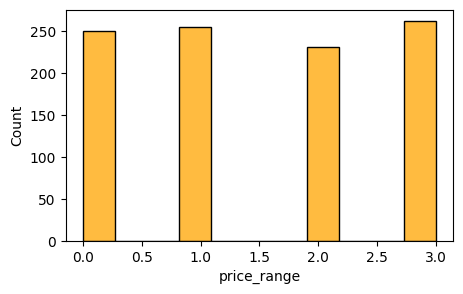

In [20]:
plt.figure(figsize = (5, 3))

sns.histplot(rf_result, x = 'price_range', color = 'orange')

plt.show()

In [21]:
rf_result['price_range'].value_counts()

price_range
3    263
1    255
0    251
2    231
Name: count, dtype: int64